In [1]:
import pandas as pd 
df = pd.read_csv("C:/Users/alfredo/Documents/GitHub/RNP/data.csv")
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [2]:
df = df.drop(['id'], axis=1)

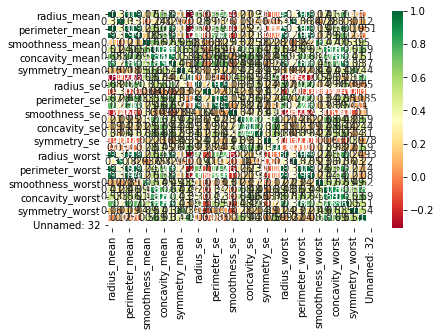

In [3]:
import seaborn as sns
fig = sns.heatmap(df.corr(),annot=True,cmap='RdYlGn',linewidths=0.2) #df_train.corr()-->correlation matrix

In [4]:
cols = ['radius_worst',
       'texture_worst',
       'perimeter_worst',
       'area_worst',
       'smoothness_worst',
       'compactness_worst',
       'concavity_worst',
       'concave points_worst',
       'symmetry_worst',
       'fractal_dimension_worst',
       'perimeter_mean',
       'perimeter_se',
       'area_mean',
       'area_se',
       'concavity_mean',
       'concavity_se',
       'concave points_mean',
       'concave points_se']

df = df.drop(cols, axis=1)

In [5]:
import numpy as np
from sklearn.model_selection import train_test_split

X_df = df
X_df = X_df.drop(['Unnamed: 32','diagnosis'], axis=1)
y_df = df['diagnosis']
y_df = [0 if x == 'B' else 1 for x in y_df]

In [6]:
x_tr, x_ts, y_tr, y_ts = train_test_split(X_df, y_df, test_size = 0.3, random_state = 42)

y_tr = np.asarray(y_tr, dtype = np.int)
y_ts = np.asarray(y_ts, dtype = np.int)

y_tr = np.reshape(y_tr, [398,1])
y_ts = np.reshape(y_ts, [171,1])

print(x_ts.shape)
print(x_tr.shape)
print(y_ts.shape)
print(y_tr.shape)

(171, 12)
(398, 12)
(171, 1)
(398, 1)


In [7]:
from sklearn.preprocessing import MinMaxScaler, Normalizer
# Training Data
x_tr = MinMaxScaler().fit_transform(x_tr)
print("Training Data :", x_tr.shape)

# Testing Data
x_ts = MinMaxScaler().fit_transform(x_ts)
print("Testing Data :", x_ts.shape)

Training Data : (398, 12)
Testing Data : (171, 12)


Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_8 (Dense)              (None, 12)                156       
_________________________________________________________________
dropout_4 (Dropout)          (None, 12)                0         
_________________________________________________________________
dense_9 (Dense)              (None, 1)                 13        
Total params: 169
Trainable params: 169
Non-trainable params: 0
_________________________________________________________________
Epoch 1/1000
13/13 [==============================] - 0s 27ms/step - loss: 0.8518 - accuracy: 0.4472 - val_loss: 0.7063 - val_accuracy: 0.3743
Epoch 2/1000
13/13 [==============================] - 0s 3ms/step - loss: 0.7258 - accuracy: 0.5377 - val_loss: 0.6538 - val_accuracy: 0.6316
Epoch 3/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.7033 - accuracy: 0.6005 -

13/13 [==============================] - 0s 2ms/step - loss: 0.6469 - accuracy: 0.6106 - val_loss: 0.6191 - val_accuracy: 0.6316
Epoch 54/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.6439 - accuracy: 0.6357 - val_loss: 0.6181 - val_accuracy: 0.6316
Epoch 55/1000
13/13 [==============================] - 0s 3ms/step - loss: 0.6408 - accuracy: 0.6231 - val_loss: 0.6176 - val_accuracy: 0.6316
Epoch 56/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.6424 - accuracy: 0.6181 - val_loss: 0.6171 - val_accuracy: 0.6316
Epoch 57/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.6382 - accuracy: 0.6156 - val_loss: 0.6165 - val_accuracy: 0.6316
Epoch 58/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.6401 - accuracy: 0.6231 - val_loss: 0.6158 - val_accuracy: 0.6316
Epoch 59/1000
13/13 [==============================] - 0s 3ms/step - loss: 0.6415 - accuracy: 0.6281 - val_loss: 0.6155 - val_accuracy: 0.6316
Epoch 60/1000

13/13 [==============================] - 0s 2ms/step - loss: 0.5924 - accuracy: 0.6533 - val_loss: 0.5599 - val_accuracy: 0.6901
Epoch 111/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.6091 - accuracy: 0.6432 - val_loss: 0.5591 - val_accuracy: 0.7251
Epoch 112/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.6080 - accuracy: 0.6583 - val_loss: 0.5572 - val_accuracy: 0.6784
Epoch 113/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.5995 - accuracy: 0.6633 - val_loss: 0.5564 - val_accuracy: 0.7076
Epoch 114/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.5876 - accuracy: 0.6709 - val_loss: 0.5547 - val_accuracy: 0.7135
Epoch 115/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.5870 - accuracy: 0.6683 - val_loss: 0.5529 - val_accuracy: 0.7251
Epoch 116/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.6111 - accuracy: 0.6508 - val_loss: 0.5521 - val_accuracy: 0.7310
Epoch 1

Epoch 167/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.5463 - accuracy: 0.7111 - val_loss: 0.4743 - val_accuracy: 0.8538
Epoch 168/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.5397 - accuracy: 0.7286 - val_loss: 0.4729 - val_accuracy: 0.8538
Epoch 169/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.5246 - accuracy: 0.7085 - val_loss: 0.4711 - val_accuracy: 0.8596
Epoch 170/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.5317 - accuracy: 0.7186 - val_loss: 0.4694 - val_accuracy: 0.8830
Epoch 171/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.5151 - accuracy: 0.7161 - val_loss: 0.4681 - val_accuracy: 0.8947
Epoch 172/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.5445 - accuracy: 0.7010 - val_loss: 0.4676 - val_accuracy: 0.9006
Epoch 173/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.5553 - accuracy: 0.7085 - val_loss: 0.4645 - val_accuracy:

Epoch 224/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.4921 - accuracy: 0.7563 - val_loss: 0.4056 - val_accuracy: 0.9532
Epoch 225/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.4659 - accuracy: 0.7688 - val_loss: 0.4064 - val_accuracy: 0.9532
Epoch 226/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.4861 - accuracy: 0.7538 - val_loss: 0.4080 - val_accuracy: 0.9532
Epoch 227/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.4972 - accuracy: 0.7462 - val_loss: 0.4005 - val_accuracy: 0.9532
Epoch 228/1000
13/13 [==============================] - 0s 3ms/step - loss: 0.5026 - accuracy: 0.7312 - val_loss: 0.3993 - val_accuracy: 0.9532
Epoch 229/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.4801 - accuracy: 0.7714 - val_loss: 0.3985 - val_accuracy: 0.9532
Epoch 230/1000
13/13 [==============================] - 0s 3ms/step - loss: 0.4769 - accuracy: 0.7462 - val_loss: 0.3981 - val_accuracy:

13/13 [==============================] - 0s 3ms/step - loss: 0.4486 - accuracy: 0.7889 - val_loss: 0.3531 - val_accuracy: 0.9474
Epoch 281/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.4676 - accuracy: 0.7538 - val_loss: 0.3538 - val_accuracy: 0.9474
Epoch 282/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.4400 - accuracy: 0.7764 - val_loss: 0.3534 - val_accuracy: 0.9474
Epoch 283/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.4438 - accuracy: 0.7965 - val_loss: 0.3509 - val_accuracy: 0.9474
Epoch 284/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.4194 - accuracy: 0.8166 - val_loss: 0.3500 - val_accuracy: 0.9474
Epoch 285/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.4845 - accuracy: 0.7538 - val_loss: 0.3531 - val_accuracy: 0.9474
Epoch 286/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.4567 - accuracy: 0.7889 - val_loss: 0.3525 - val_accuracy: 0.9474
Epoch 2

Epoch 337/1000
13/13 [==============================] - 0s 3ms/step - loss: 0.4080 - accuracy: 0.8191 - val_loss: 0.3137 - val_accuracy: 0.9591
Epoch 338/1000
13/13 [==============================] - 0s 3ms/step - loss: 0.4263 - accuracy: 0.7990 - val_loss: 0.3111 - val_accuracy: 0.9532
Epoch 339/1000
13/13 [==============================] - 0s 3ms/step - loss: 0.4481 - accuracy: 0.8116 - val_loss: 0.3095 - val_accuracy: 0.9532
Epoch 340/1000
13/13 [==============================] - 0s 3ms/step - loss: 0.4328 - accuracy: 0.7940 - val_loss: 0.3132 - val_accuracy: 0.9591
Epoch 341/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.4291 - accuracy: 0.7965 - val_loss: 0.3132 - val_accuracy: 0.9591
Epoch 342/1000
13/13 [==============================] - 0s 3ms/step - loss: 0.4068 - accuracy: 0.8191 - val_loss: 0.3138 - val_accuracy: 0.9532
Epoch 343/1000
13/13 [==============================] - 0s 3ms/step - loss: 0.4126 - accuracy: 0.8216 - val_loss: 0.3143 - val_accuracy:

13/13 [==============================] - 0s 2ms/step - loss: 0.4046 - accuracy: 0.8141 - val_loss: 0.2936 - val_accuracy: 0.9240
Epoch 394/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3927 - accuracy: 0.8015 - val_loss: 0.2958 - val_accuracy: 0.9240
Epoch 395/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3951 - accuracy: 0.8342 - val_loss: 0.2917 - val_accuracy: 0.9240
Epoch 396/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3639 - accuracy: 0.8467 - val_loss: 0.2946 - val_accuracy: 0.9240
Epoch 397/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3905 - accuracy: 0.8291 - val_loss: 0.2951 - val_accuracy: 0.9240
Epoch 398/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3953 - accuracy: 0.8065 - val_loss: 0.2941 - val_accuracy: 0.9240
Epoch 399/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3716 - accuracy: 0.8392 - val_loss: 0.2950 - val_accuracy: 0.9240
Epoch 4

Epoch 450/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3764 - accuracy: 0.8442 - val_loss: 0.2735 - val_accuracy: 0.9240
Epoch 451/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3653 - accuracy: 0.8317 - val_loss: 0.2746 - val_accuracy: 0.9240
Epoch 452/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3829 - accuracy: 0.8216 - val_loss: 0.2792 - val_accuracy: 0.9298
Epoch 453/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3217 - accuracy: 0.8593 - val_loss: 0.2773 - val_accuracy: 0.9240
Epoch 454/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3585 - accuracy: 0.8518 - val_loss: 0.2802 - val_accuracy: 0.9298
Epoch 455/1000
13/13 [==============================] - 0s 3ms/step - loss: 0.3933 - accuracy: 0.8241 - val_loss: 0.2852 - val_accuracy: 0.9298
Epoch 456/1000
13/13 [==============================] - 0s 3ms/step - loss: 0.3582 - accuracy: 0.8317 - val_loss: 0.2831 - val_accuracy:

13/13 [==============================] - 0s 2ms/step - loss: 0.3492 - accuracy: 0.8467 - val_loss: 0.2762 - val_accuracy: 0.9298
Epoch 507/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3139 - accuracy: 0.8568 - val_loss: 0.2751 - val_accuracy: 0.9298
Epoch 508/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3223 - accuracy: 0.8643 - val_loss: 0.2754 - val_accuracy: 0.9298
Epoch 509/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3724 - accuracy: 0.8291 - val_loss: 0.2736 - val_accuracy: 0.9298
Epoch 510/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3539 - accuracy: 0.8317 - val_loss: 0.2746 - val_accuracy: 0.9298
Epoch 511/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3502 - accuracy: 0.8291 - val_loss: 0.2699 - val_accuracy: 0.9298
Epoch 512/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3818 - accuracy: 0.8191 - val_loss: 0.2733 - val_accuracy: 0.9298
Epoch 5

Epoch 563/1000
13/13 [==============================] - 0s 3ms/step - loss: 0.3220 - accuracy: 0.8618 - val_loss: 0.2653 - val_accuracy: 0.9298
Epoch 564/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3285 - accuracy: 0.8568 - val_loss: 0.2634 - val_accuracy: 0.9298
Epoch 565/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3439 - accuracy: 0.8543 - val_loss: 0.2682 - val_accuracy: 0.9181
Epoch 566/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3384 - accuracy: 0.8543 - val_loss: 0.2692 - val_accuracy: 0.9181
Epoch 567/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3400 - accuracy: 0.8467 - val_loss: 0.2722 - val_accuracy: 0.9181
Epoch 568/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3155 - accuracy: 0.8568 - val_loss: 0.2750 - val_accuracy: 0.9064
Epoch 569/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3186 - accuracy: 0.8543 - val_loss: 0.2729 - val_accuracy:

Epoch 620/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3050 - accuracy: 0.8593 - val_loss: 0.2728 - val_accuracy: 0.8947
Epoch 621/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3125 - accuracy: 0.8719 - val_loss: 0.2671 - val_accuracy: 0.9064
Epoch 622/1000
13/13 [==============================] - 0s 3ms/step - loss: 0.3362 - accuracy: 0.8693 - val_loss: 0.2691 - val_accuracy: 0.9064
Epoch 623/1000
13/13 [==============================] - 0s 3ms/step - loss: 0.3354 - accuracy: 0.8593 - val_loss: 0.2706 - val_accuracy: 0.9064
Epoch 624/1000
13/13 [==============================] - 0s 3ms/step - loss: 0.3087 - accuracy: 0.8894 - val_loss: 0.2633 - val_accuracy: 0.9123
Epoch 625/1000
13/13 [==============================] - 0s 3ms/step - loss: 0.3221 - accuracy: 0.8618 - val_loss: 0.2626 - val_accuracy: 0.9123
Epoch 626/1000
13/13 [==============================] - 0s 3ms/step - loss: 0.3237 - accuracy: 0.8543 - val_loss: 0.2664 - val_accuracy:

Epoch 677/1000
13/13 [==============================] - 0s 3ms/step - loss: 0.3105 - accuracy: 0.8869 - val_loss: 0.2683 - val_accuracy: 0.8889
Epoch 678/1000
13/13 [==============================] - 0s 3ms/step - loss: 0.3215 - accuracy: 0.8543 - val_loss: 0.2715 - val_accuracy: 0.8889
Epoch 679/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3427 - accuracy: 0.8417 - val_loss: 0.2816 - val_accuracy: 0.8830
Epoch 680/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3131 - accuracy: 0.8643 - val_loss: 0.2772 - val_accuracy: 0.8889
Epoch 681/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3234 - accuracy: 0.8492 - val_loss: 0.2748 - val_accuracy: 0.8889
Epoch 682/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.2827 - accuracy: 0.8769 - val_loss: 0.2704 - val_accuracy: 0.8889
Epoch 683/1000
13/13 [==============================] - ETA: 0s - loss: 0.2995 - accuracy: 0.90 - 0s 2ms/step - loss: 0.3282 - accuracy:

13/13 [==============================] - 0s 2ms/step - loss: 0.3567 - accuracy: 0.8392 - val_loss: 0.2669 - val_accuracy: 0.8889
Epoch 734/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3057 - accuracy: 0.8769 - val_loss: 0.2714 - val_accuracy: 0.8889
Epoch 735/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3231 - accuracy: 0.8618 - val_loss: 0.2682 - val_accuracy: 0.8889
Epoch 736/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3243 - accuracy: 0.8643 - val_loss: 0.2665 - val_accuracy: 0.8889
Epoch 737/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3087 - accuracy: 0.8693 - val_loss: 0.2698 - val_accuracy: 0.8889
Epoch 738/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.2969 - accuracy: 0.8744 - val_loss: 0.2722 - val_accuracy: 0.8830
Epoch 739/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3074 - accuracy: 0.8618 - val_loss: 0.2708 - val_accuracy: 0.8889
Epoch 7

Epoch 790/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.2957 - accuracy: 0.8668 - val_loss: 0.2734 - val_accuracy: 0.8830
Epoch 791/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3126 - accuracy: 0.8643 - val_loss: 0.2742 - val_accuracy: 0.8830
Epoch 792/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3136 - accuracy: 0.8442 - val_loss: 0.2741 - val_accuracy: 0.8830
Epoch 793/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3150 - accuracy: 0.8719 - val_loss: 0.2736 - val_accuracy: 0.8830
Epoch 794/1000
13/13 [==============================] - 0s 3ms/step - loss: 0.2742 - accuracy: 0.8844 - val_loss: 0.2702 - val_accuracy: 0.8830
Epoch 795/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.2864 - accuracy: 0.8643 - val_loss: 0.2738 - val_accuracy: 0.8830
Epoch 796/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.2853 - accuracy: 0.8920 - val_loss: 0.2765 - val_accuracy:

Epoch 847/1000
13/13 [==============================] - 0s 4ms/step - loss: 0.3154 - accuracy: 0.8769 - val_loss: 0.2783 - val_accuracy: 0.8772
Epoch 848/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3091 - accuracy: 0.8643 - val_loss: 0.2703 - val_accuracy: 0.8830
Epoch 849/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3010 - accuracy: 0.8668 - val_loss: 0.2728 - val_accuracy: 0.8830
Epoch 850/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3043 - accuracy: 0.8920 - val_loss: 0.2735 - val_accuracy: 0.8830
Epoch 851/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3088 - accuracy: 0.8543 - val_loss: 0.2729 - val_accuracy: 0.8830
Epoch 852/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3040 - accuracy: 0.8719 - val_loss: 0.2752 - val_accuracy: 0.8830
Epoch 853/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3101 - accuracy: 0.8869 - val_loss: 0.2776 - val_accuracy:

Epoch 904/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.2980 - accuracy: 0.8668 - val_loss: 0.2744 - val_accuracy: 0.8830
Epoch 905/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.2936 - accuracy: 0.8643 - val_loss: 0.2734 - val_accuracy: 0.8830
Epoch 906/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3015 - accuracy: 0.8719 - val_loss: 0.2712 - val_accuracy: 0.8830
Epoch 907/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3047 - accuracy: 0.8794 - val_loss: 0.2719 - val_accuracy: 0.8830
Epoch 908/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3001 - accuracy: 0.8794 - val_loss: 0.2711 - val_accuracy: 0.8830
Epoch 909/1000
13/13 [==============================] - 0s 3ms/step - loss: 0.3161 - accuracy: 0.8744 - val_loss: 0.2765 - val_accuracy: 0.8830
Epoch 910/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.2856 - accuracy: 0.8794 - val_loss: 0.2734 - val_accuracy:

Epoch 961/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.3136 - accuracy: 0.8593 - val_loss: 0.2659 - val_accuracy: 0.8830
Epoch 962/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.2644 - accuracy: 0.8995 - val_loss: 0.2682 - val_accuracy: 0.8830
Epoch 963/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.2711 - accuracy: 0.8794 - val_loss: 0.2690 - val_accuracy: 0.8830
Epoch 964/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.2917 - accuracy: 0.8920 - val_loss: 0.2710 - val_accuracy: 0.8830
Epoch 965/1000
13/13 [==============================] - 0s 2ms/step - loss: 0.2527 - accuracy: 0.9146 - val_loss: 0.2791 - val_accuracy: 0.8713
Epoch 966/1000
13/13 [==============================] - 0s 3ms/step - loss: 0.2944 - accuracy: 0.8769 - val_loss: 0.2840 - val_accuracy: 0.8655
Epoch 967/1000
13/13 [==============================] - 0s 3ms/step - loss: 0.3269 - accuracy: 0.8618 - val_loss: 0.2880 - val_accuracy:

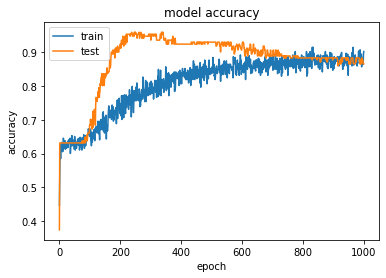

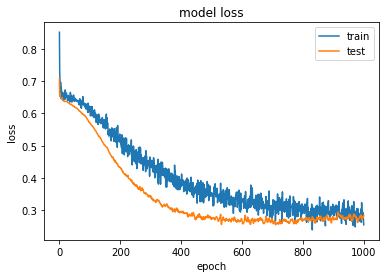

Maximum Loss : 0.8518

Minimum Loss : 0.2388

Loss difference : 0.6131


In [12]:
import numpy as np
import tensorflow as tf
from matplotlib import pyplot as plt
from keras.models import Sequential
from keras.layers.core import Dense
from keras.layers import Dropout

# Hyperparameters
training_epochs = 1000 # Total number of training epochs
learning_rate = 0.01 # The learning rate
momentum = 0.9

# create a model
def create_model():
    model = tf.keras.Sequential()
    # Hidden layer
    model.add(tf.keras.layers.Dense(12, input_dim=12,activation='sigmoid'))
    model.add(Dropout(0.5))
    # Output layer
    model.add(tf.keras.layers.Dense(1, activation='sigmoid'))

    # Compile a model
    model.compile(loss='binary_crossentropy', 
                  optimizer=tf.keras.optimizers.SGD(learning_rate, momentum),
                  metrics=['accuracy'])
    return model

model = create_model()
model.summary()

results = model.fit(
    x_tr, y_tr,
    epochs= training_epochs,
    validation_data = (x_ts, y_ts),
    verbose = 1
)



print("Evaluating on training set...")
(loss, accuracy) = model.evaluate(x_tr, y_tr, verbose=0)
print("loss={:.4f}, accuracy: {:.4f}%".format(loss,accuracy * 100))

print("Evaluating on testing set...")
(loss, accuracy) = model.evaluate(x_ts, y_ts, verbose=0)
print("loss={:.4f}, accuracy: {:.4f}%".format(loss,accuracy * 100))


# summarize history for accuracy
plt.plot(results.history['accuracy'])
plt.plot(results.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'])
plt.show()

# summarize history for loss
plt.plot(results.history['loss'])
plt.plot(results.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'])
plt.show()


max_loss = np.max(results.history['loss'])
min_loss = np.min(results.history['loss'])
print("Maximum Loss : {:.4f}".format(max_loss))
print("")
print("Minimum Loss : {:.4f}".format(min_loss))
print("")
print("Loss difference : {:.4f}".format((max_loss - min_loss)))